<a href="https://colab.research.google.com/github/smuratsirin/Market_Design_Lit_Review/blob/main/Electricity_Market_Design_Literature_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install litstudy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 1.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.9 MB/s eta 0:00:00
  Created wheel for litstudy: filename=litstudy-1.0.6-py3-none-any.whl size=50024 sha256=037679817b080a743535e804d6a194dad9d3bb5adc552b2f13910d9347a852e0
  Stored in directory: /root/.cache/pip/wheels/72/97/1c/6327aca

In [6]:
import pandas as pd
import litstudy
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs
os.chdir("/content/sample_data")

# Load your data
wos = litstudy.load_csv('wos_highpenetration_litreview.csv',
                        title_field = "Article Title",
                        authors_field = "Authors",
                        abstract_field = "Abstract",
                        date_field = "Publication Year",
                        citation_field = None)

In [7]:
print(wos)

<2089 documents>


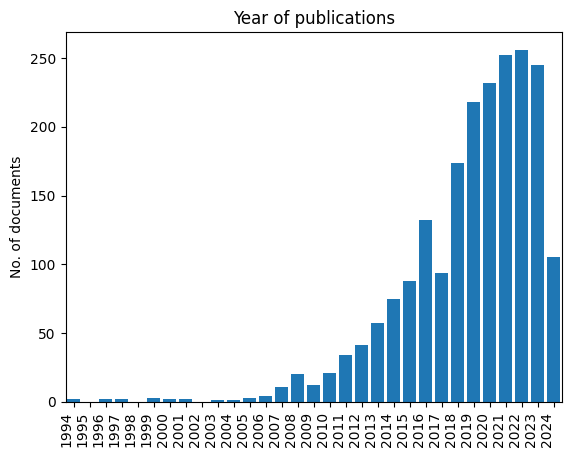

In [8]:
litstudy.plot_year_histogram(wos, vertical=True);

In [9]:
import random
random.seed(42)
corpus = litstudy.build_corpus(wos, ngram_threshold=0.8)

In [10]:
num_topics = 20
topic_model = litstudy.train_nmf_model(corpus, num_topics, max_iter=500)

In [1]:
plt.figure(figsize=(15, 5))
litstudy.plot_topic_clouds(topic_model, ncols=5);

NameError: name 'plt' is not defined

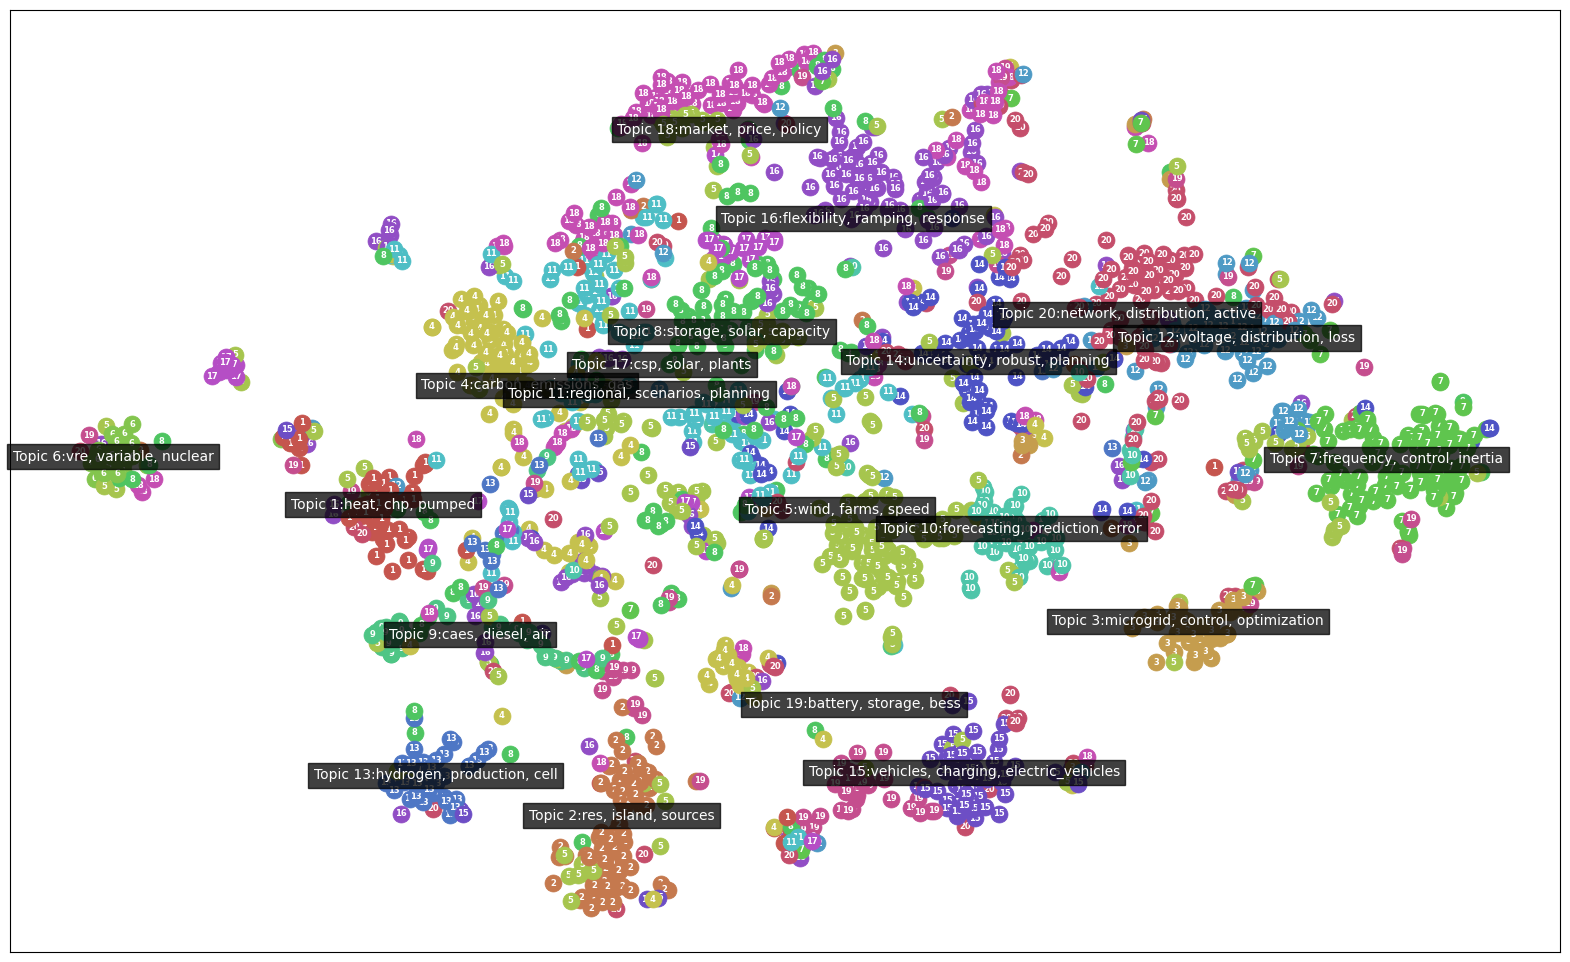

In [8]:
plt.figure(figsize=(20, 20))
litstudy.plot_embedding(corpus, topic_model);

In [9]:
for i in range(num_topics):
    print(f'Topic {i+1}:', topic_model.best_tokens_for_topic(i))

Topic 1: ['heat', 'chp', 'pumped', 'district', 'thermal']
Topic 2: ['res', 'island', 'sources', 'isolated', 'autonomous']
Topic 3: ['microgrid', 'control', 'optimization', 'multi', 'management']
Topic 4: ['carbon', 'emissions', 'gas', 'coal', 'fired']
Topic 5: ['wind', 'farms', 'speed', 'turbines', 'hydro']
Topic 6: ['vre', 'variable', 'nuclear', 'transmission', 'requirements']
Topic 7: ['frequency', 'control', 'inertia', 'regulation', 'stability']
Topic 8: ['storage', 'solar', 'capacity', 'cost', 'value']
Topic 9: ['caes', 'diesel', 'air', 'compressed', 'compressed_air']
Topic 10: ['forecasting', 'prediction', 'error', 'accuracy', 'learning']
Topic 11: ['regional', 'scenarios', 'planning', 'sector', 'long_term']
Topic 12: ['voltage', 'distribution', 'loss', 'inverter', 'feeder']
Topic 13: ['hydrogen', 'production', 'cell', 'fuel', 'electrolysis']
Topic 14: ['uncertainty', 'robust', 'planning', 'units', 'commitment']
Topic 15: ['vehicles', 'charging', 'electric_vehicles', 'evs', 'plug'

In [10]:
topic_id = topic_model.best_topic_for_token('market')
topic_id

17

In [11]:
topic_model.best_documents_for_topic(topic_id, limit = 400)

array([1009,  131,  446,  127, 1875,  468, 1051, 1928, 2076,  693,   53,
        101,  759,  725, 1444, 1452,  639, 1433,  465, 1278,  453, 1607,
        508,  898, 1249, 1852,   55,   17, 1120, 1942, 1746,  549, 1170,
        626,  625,  613,  502,   39,  411, 1166,  374,  534,   38,  305,
        274,  767, 1368,  120,  379,  874, 1378, 1279, 1790, 1239, 1869,
       1299,  665, 1397,  352,  791,  197,   44, 1774, 2077, 1697,  394,
        768, 1341, 1112, 1752,  355,   86, 1344,  435, 1508,  457, 1305,
       1445, 1438,  800, 1629, 1832,  812,  929,  373, 1845,  276, 1957,
       1189,  583, 1849, 1254,   36,  858, 1235, 1432,  896, 1550,  388,
        158, 1859, 1530, 1045,  254,   27, 1013,  333, 1248, 1989,   14,
       1676, 2008,  381, 2005,  269, 1078, 1977,  553,  912,  243, 1293,
       1251,  596,  842,  194, 1101,  740,  325,   78, 1555,  140,  999,
       1660, 1761, 1731, 1758,  419,  883,  591,   73, 1870,  363, 1323,
        853,  928,  848,  984, 1748, 1359,  574, 10

In [13]:
import pandas as pd
# Initialize an empty list to store the data
papers = []

# Retrieve the best documents for the current topic
for doc_id in topic_model.best_documents_for_topic(topic_id, limit=400):
        # Append the doc_id and title to the data list
        papers.append({
            'Topic Number': topic_id,
            'Document ID': doc_id,
            'Article Title': wos[int(doc_id)].title
        })

# Convert the data list to a DataFrame
selected_papers = pd.DataFrame(papers)
selected_papers

,Topic Number,Document ID,Article Title
0,17,1009,Impact of renewables on electricity markets - ...
1,17,131,Impact of market design on cost-effectiveness ...
2,17,446,Electricity market design under increasing ren...
3,17,127,The Spanish intraday market design: A successf...
4,17,1875,Electricity market-clearing prices and investm...
...,...,...,...
395,17,117,Renewable energy curtailment: A case study on ...
396,17,123,Pumped hydroelectric storage utilization asses...
397,17,1986,Economic trends and comparisons for optimizing...
398,17,173,Economic analysis of a nuclear hybrid energy s...


In [14]:
# Load the CSV file
file_path = '/content/sample_data/wos_highpenetration_litreview.csv'  # replace with the path to your CSV file
lit_review = pd.read_csv(file_path, encoding = "latin1")

# Add a new column named "Document ID" with the row numbers
lit_review['Document ID'] = lit_review.index
lit_review

,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,...,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record,Document ID
0,J,"Segurado, R; Krajacic, G; Duic, N; Alves, L",NaN,NaN,NaN,"Segurado, Raquel; Krajacic, Goran; Duic, Neven...",NaN,NaN,Increasing the penetration of renewable energy...,APPLIED ENERGY,...,Energy & Fuels; Engineering,690BJ,NaN,Green Accepted,NaN,NaN,2024-05-21,WOS:000284974800007,View Full Record in Web of Science,0
1,J,"Cheng, YH; Zhang, N; Kirschen, DS; Huang, WJ; ...",NaN,NaN,NaN,"Cheng, Yaohua; Zhang, Ning; Kirschen, Daniel S...",NaN,NaN,Planning multiple energy systems for low-carbo...,APPLIED ENERGY,...,Energy & Fuels; Engineering,KN8TI,NaN,NaN,NaN,NaN,2024-05-21,WOS:000515117500059,View Full Record in Web of Science,1
2,J,"Supriyadi, ANC; Takano, H; Murata, J; Goda, T",NaN,NaN,NaN,"Supriyadi, A. N. Cuk; Takano, H.; Murata, J.; ...",NaN,NaN,Adaptive robust PSS to enhance stabilization o...,RENEWABLE ENERGY,...,Science & Technology - Other Topics; Energy & ...,300TY,NaN,NaN,NaN,NaN,2024-05-21,WOS:000330488100086,View Full Record in Web of Science,2
3,J,"Dalala, Z; Al-Omari, M; Al-Addous, M; Bdour, M...",NaN,NaN,NaN,"Dalala, Zakariya; Al-Omari, Murad; Al-Addous, ...",NaN,NaN,Increased renewable energy penetration in nati...,ENERGY,...,Thermodynamics; Energy & Fuels,1A5XU,NaN,NaN,NaN,NaN,2024-05-21,WOS:000791830300006,View Full Record in Web of Science,3
4,J,"Yu, BL; Fang, DB; Yu, HW; Zhao, CY",NaN,NaN,NaN,"Yu, Bolin; Fang, Debin; Yu, Hongwei; Zhao, Cha...",NaN,NaN,Temporal-spatial determinants of renewable ene...,RENEWABLE ENERGY,...,Science & Technology - Other Topics; Energy & ...,WK5WX,NaN,NaN,NaN,NaN,2024-05-21,WOS:000709797700003,View Full Record in Web of Science,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2084,J,"Beyza, J; Yusta, JM",NaN,NaN,NaN,"Beyza, Jesus; Yusta, Jose M.",NaN,NaN,Characterising the security of power system to...,ENERGY STRATEGY REVIEWS,...,Energy & Fuels,5B1GD,NaN,"gold, Green Published",NaN,NaN,2024-05-21,WOS:000863322800005,View Full Record in Web of Science,2084
2085,J,"Islam, S; Iqbal, A; Marzband, M; Khan, I; Al-W...",NaN,NaN,NaN,"Islam, Shirazul; Iqbal, Atif; Marzband, Mousa;...",NaN,NaN,State-of-the-art vehicle-to-everything mode of...,RENEWABLE & SUSTAINABLE ENERGY REVIEWS,...,Science & Technology - Other Topics; Energy & ...,2D8ZQ,NaN,Green Accepted,NaN,NaN,2024-05-21,WOS:000811828500001,View Full Record in Web of Science,2085
2086,J,"Paterakis, NG; Gibescu, M",NaN,NaN,NaN,"Paterakis, Nikolaos G.; Gibescu, Madeleine",NaN,NaN,A methodology to generate power profiles of el...,APPLIED ENERGY,...,Energy & Fuels; Engineering,DN7DJ,NaN,"hybrid, Green Published",NaN,NaN,2024-05-21,WOS:000377235200011,View Full Record in Web of Science,2086
2087,J,"Ye, L; Zhang, CH; Xue, H; Li, JC; Lu, P; Zhao, YN",NaN,NaN,NaN,"Ye, Lin; Zhang, Cihang; Xue, Hui; Li, Jiachen;...",NaN,NaN,Study of assessment on capability of wind powe...,RENEWABLE ENERGY,...,Science & Technology - Other Topics; Energy & ...,HI9FS,NaN,NaN,NaN,NaN,2024-05-21,WOS:000456761300058,View Full Record in Web of Science,2087


In [15]:
merged_df = pd.merge(selected_papers, lit_review, on='Document ID')

# Save the merged DataFrame to a new CSV file
merged_csv_filename = 'literature_review_first_stage_results.csv'
merged_df.to_csv(merged_csv_filename, index=False)

In [16]:
merged_df

,Topic Number,Document ID,Article Title_x,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,...,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record
0,17,1009,Impact of renewables on electricity markets - ...,J,"Winkler, J; Gaio, A; Pfluger, B; Ragwitz, M",NaN,NaN,NaN,"Winkler, Jenny; Gaio, Alberto; Pfluger, Benjam...",NaN,...,Science Citation Index Expanded (SCI-EXPANDED)...,Business & Economics; Energy & Fuels; Environm...,DL1AH,NaN,NaN,NaN,NaN,2024-05-21,WOS:000375363800019,View Full Record in Web of Science
1,17,131,Impact of market design on cost-effectiveness ...,J,"Shayegh, S; Sanchez, DL",NaN,NaN,NaN,"Shayegh, Soheil; Sanchez, Daniel L.",NaN,...,Science Citation Index Expanded (SCI-EXPANDED)...,Science & Technology - Other Topics; Energy & ...,PE9ZB,NaN,Green Published,NaN,NaN,2024-05-21,WOS:000598717800002,View Full Record in Web of Science
2,17,446,Electricity market design under increasing ren...,J,"Peng, DN; Poudineh, R",NaN,NaN,NaN,"Peng, Donna; Poudineh, Rahmatallah",NaN,...,Science Citation Index Expanded (SCI-EXPANDED)...,Energy & Fuels; Environmental Sciences & Ecology,JU4NT,NaN,NaN,NaN,NaN,2024-05-21,WOS:000501655000003,View Full Record in Web of Science
3,17,127,The Spanish intraday market design: A successf...,J,"Chaves-Avila, JP; Fernandes, C",NaN,NaN,NaN,"Chaves-Avila, J. P.; Fernandes, C.",NaN,...,Science Citation Index Expanded (SCI-EXPANDED)...,Science & Technology - Other Topics; Energy & ...,AU9YK,NaN,NaN,NaN,NaN,2024-05-21,WOS:000345947700046,View Full Record in Web of Science
4,17,1875,Electricity market-clearing prices and investm...,J,"Herrero, I; Rodilla, P; Batlle, C",NaN,NaN,NaN,"Herrero, Ignacio; Rodilla, Pablo; Batlle, Carlos",NaN,...,Social Science Citation Index (SSCI),Business & Economics,CB4IK,NaN,NaN,NaN,NaN,2024-05-21,WOS:000349591200006,View Full Record in Web of Science
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,17,117,Renewable energy curtailment: A case study on ...,J,"Schermeyer, H; Vergara, C; Fichtner, W",NaN,NaN,NaN,"Schermeyer, Hans; Vergara, Claudio; Fichtner, ...",NaN,...,Science Citation Index Expanded (SCI-EXPANDED)...,Business & Economics; Energy & Fuels; Environm...,FO2NK,NaN,NaN,NaN,NaN,2024-05-21,WOS:000416615800042,View Full Record in Web of Science
396,17,123,Pumped hydroelectric storage utilization asses...,J,"Kougias, I; Szabó, S",NaN,NaN,NaN,"Kougias, Ioannis; Szabo, Sandor",NaN,...,Science Citation Index Expanded (SCI-EXPANDED)...,Thermodynamics; Energy & Fuels,FM9DI,NaN,hybrid,NaN,NaN,2024-05-21,WOS:000415394200030,View Full Record in Web of Science
397,17,1986,Economic trends and comparisons for optimizing...,J,"Tsianikas, S; Zhou, J; Birnie, DP; Coit, DW",NaN,NaN,NaN,"Tsianikas, Stamatis; Zhou, Jian; Birnie, Dunba...",NaN,...,Science Citation Index Expanded (SCI-EXPANDED),Energy & Fuels; Engineering,JP0RO,NaN,hybrid,NaN,NaN,2024-05-21,WOS:000497981300017,View Full Record in Web of Science
398,17,173,Economic analysis of a nuclear hybrid energy s...,J,"Epiney, A; Rabiti, C; Talbot, P; Alfonsi, A",NaN,NaN,NaN,"Epiney, A.; Rabiti, C.; Talbot, P.; Alfonsi, A.",NaN,...,Science Citation Index Expanded (SCI-EXPANDED),Energy & Fuels; Engineering,KN8PZ,NaN,"Green Submitted, hybrid",NaN,NaN,2024-05-21,WOS:000515108700056,View Full Record in Web of Science


In [17]:
## Now, conduct the second stage to see the context better
# Load your data
wos2 = litstudy.load_csv('literature_review_first_stage_results.csv',
                        title_field = "Article Title_x",
                        authors_field = "Authors",
                        abstract_field = "Abstract",
                        date_field = "Publication Year",
                        citation_field = None)
wos2

<400 documents>

In [18]:
import random
random.seed(42)
corpus2 = litstudy.build_corpus(wos2, ngram_threshold=0.8)

In [22]:
num_topics2 = 20
topic_model2 = litstudy.train_nmf_model(corpus2, num_topics2,
                                         max_iter = 500)

In [34]:
for i in range(num_topics2):
    print(f'Topic {i+1}:', topic_model2.best_tokens_for_topic(i))

Topic 1: ['distributed', 'ders', 'scheduling', 'operation', 'mgs']
Topic 2: ['vehicles', 'charging', 'grid', 'evs', 'transmission']
Topic 3: ['nem', 'australia', 'solar', 'australian', 'wind']
Topic 4: ['tariff', 'countries', 'policy', 'feed', 'feed_tariffs']
Topic 5: ['capacity', 'border', 'cross_border', 'interconnection', 'coordination']
Topic 6: ['heat', 'pumps', 'district', 'district_heating', 'water']
Topic 7: ['risk', 'hedge', 'uncertainty', 'averse', 'self']
Topic 8: ['forecasting', 'learning', 'prediction', 'bidding', 'deep']
Topic 9: ['wind', 'balancing', 'farms', 'forecasting', 'stored']
Topic 10: ['peer', 'households', 'trading', 'peer_peer', 'battery']
Topic 11: ['services', 'frequency', 'ancillary', 'ancillary_services', 'regulation']
Topic 12: ['carbon', 'emissions', 'china', 'gas', 'fossil']
Topic 13: ['vre', 'retail', 'rate', 'value', 'residential']
Topic 14: ['flexibility', 'aggregators', 'prosumers', 'response', 'demand']
Topic 15: ['investors', 'investment', 'techno

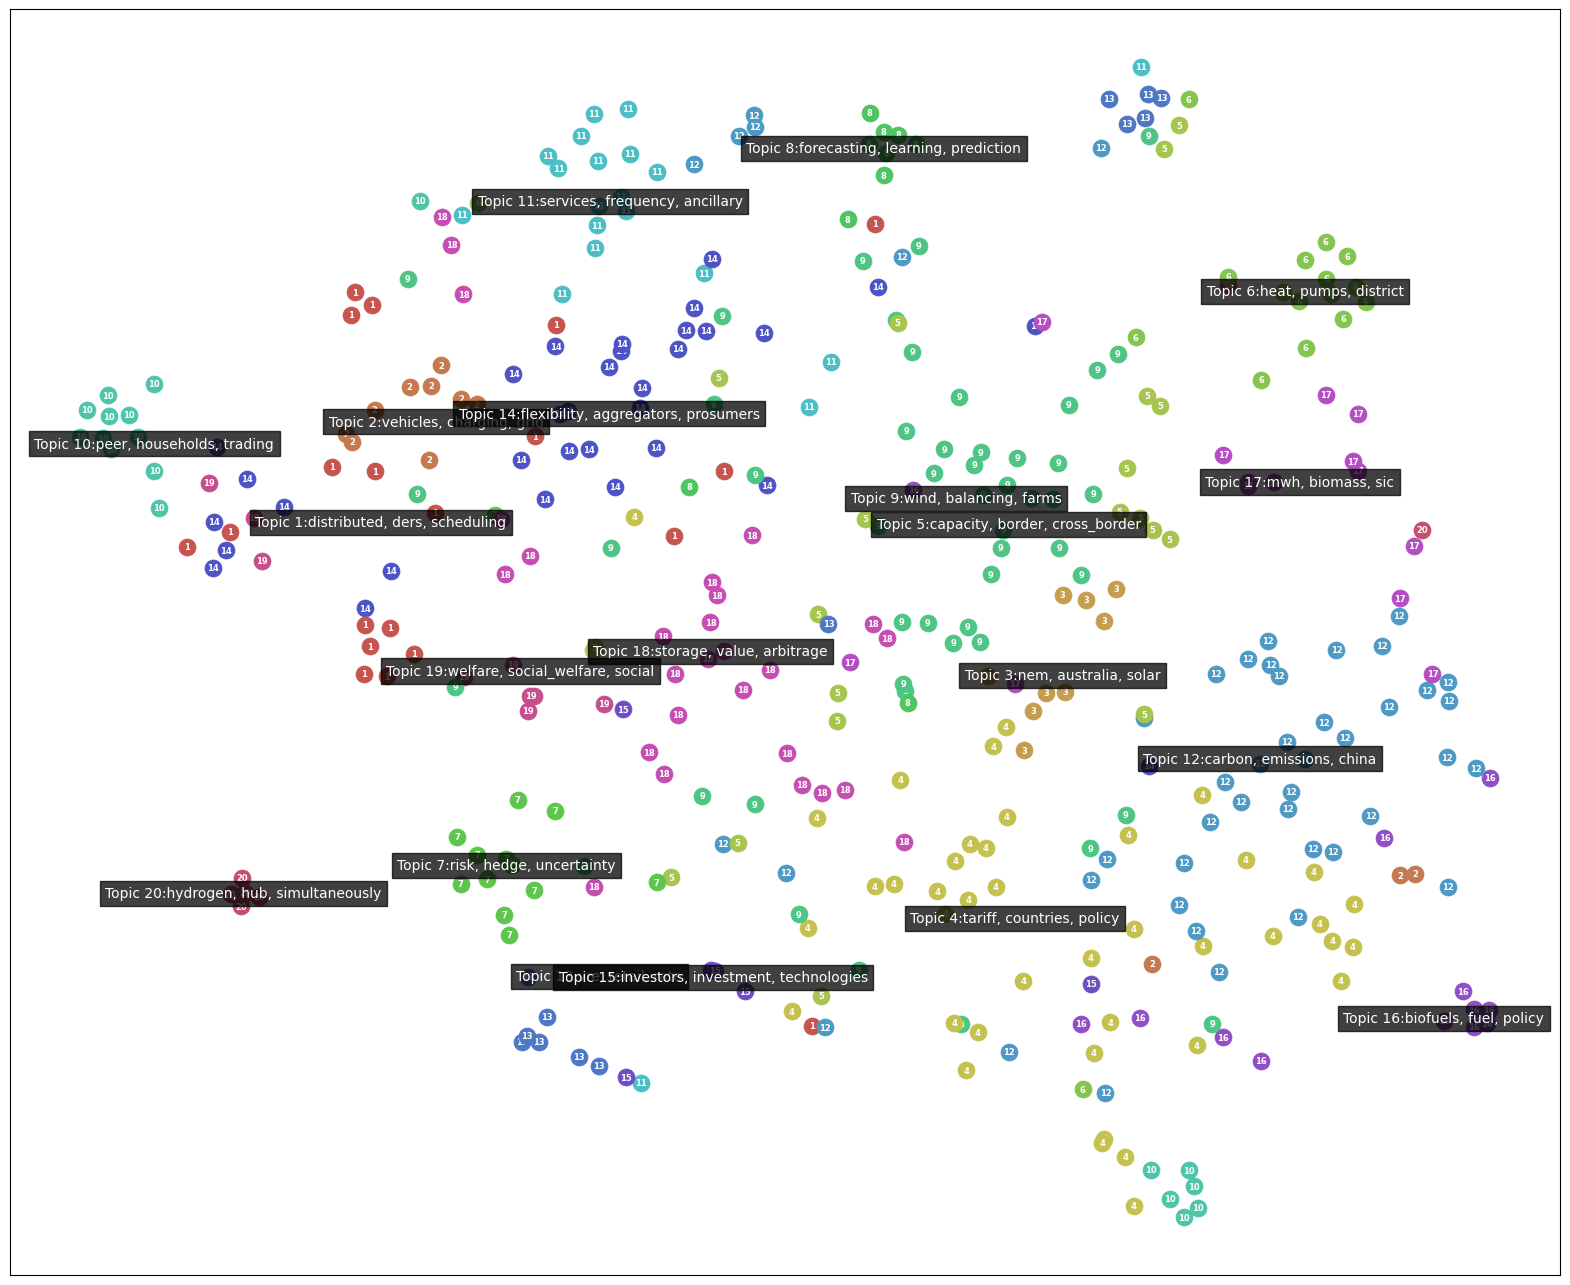

In [23]:
plt.figure(figsize=(20, 20))
litstudy.plot_embedding(corpus2, topic_model2);

In [33]:
for i in range(num_topics2):
    print(f'Topic {i+1}:', topic_model2.best_tokens_for_topic(i))

Topic 1: ['distributed', 'ders', 'scheduling', 'operation', 'mgs']
Topic 2: ['vehicles', 'charging', 'grid', 'evs', 'transmission']
Topic 3: ['nem', 'australia', 'solar', 'australian', 'wind']
Topic 4: ['tariff', 'countries', 'policy', 'feed', 'feed_tariffs']
Topic 5: ['capacity', 'border', 'cross_border', 'interconnection', 'coordination']
Topic 6: ['heat', 'pumps', 'district', 'district_heating', 'water']
Topic 7: ['risk', 'hedge', 'uncertainty', 'averse', 'self']
Topic 8: ['forecasting', 'learning', 'prediction', 'bidding', 'deep']
Topic 9: ['wind', 'balancing', 'farms', 'forecasting', 'stored']
Topic 10: ['peer', 'households', 'trading', 'peer_peer', 'battery']
Topic 11: ['services', 'frequency', 'ancillary', 'ancillary_services', 'regulation']
Topic 12: ['carbon', 'emissions', 'china', 'gas', 'fossil']
Topic 13: ['vre', 'retail', 'rate', 'value', 'residential']
Topic 14: ['flexibility', 'aggregators', 'prosumers', 'response', 'demand']
Topic 15: ['investors', 'investment', 'techno

In [25]:
import pandas as pd
# Initialize an empty list to store the data
papers2 = []

# Loop through each topic_id from 1 to n
for topic_id in range(num_topics2):
    # Retrieve the best documents for the current topic
    for doc_id in topic_model2.best_documents_for_topic(topic_id, limit=20):
        # Append the doc_id and title to the data list
        papers2.append({
            'Topic Number': topic_id + 1,
            'Document ID': doc_id,
            'Title': wos2[int(doc_id)].title
        })

# Convert the data list to a DataFrame
selected_papers2 = pd.DataFrame(papers2)

# Display the DataFrame
print(selected_papers2)


     Topic Number  Document ID  \
0               1          289   
1               1          210   
2               1          329   
3               1          346   
4               1          163   
..            ...          ...   
395            20           58   
396            20          264   
397            20          376   
398            20          114   
399            20          318   

                                                 Title  
0    Power-based distribution locational marginal p...  
1    Strategic active and reactive power scheduling...  
2    Flexibility-constrained operation scheduling o...  
3    Integrated DR and reconfiguration scheduling f...  
4    A tri-level framework for distribution-level m...  
..                                                 ...  
395  Using dispatchable energy price to influence r...  
396  Towards reliability competition: Non-cooperati...  
397  Public awareness of renewable energy sources a...  
398  Cost benefit ind

In [26]:
# Load the CSV file
file_path = 'literature_review_first_stage_results.csv'  # replace with the path to your CSV file
lit_review_2 = pd.read_csv(file_path, encoding = "latin1")

# Add a new column named "Document ID" with the row numbers
lit_review_2['Document ID'] = lit_review_2.index
lit_review_2

,Topic Number,Document ID,Article Title_x,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,...,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record
0,17,0,Impact of renewables on electricity markets - ...,J,"Winkler, J; Gaio, A; Pfluger, B; Ragwitz, M",NaN,NaN,NaN,"Winkler, Jenny; Gaio, Alberto; Pfluger, Benjam...",NaN,...,Science Citation Index Expanded (SCI-EXPANDED)...,Business & Economics; Energy & Fuels; Environm...,DL1AH,NaN,NaN,NaN,NaN,2024-05-21,WOS:000375363800019,View Full Record in Web of Science
1,17,1,Impact of market design on cost-effectiveness ...,J,"Shayegh, S; Sanchez, DL",NaN,NaN,NaN,"Shayegh, Soheil; Sanchez, Daniel L.",NaN,...,Science Citation Index Expanded (SCI-EXPANDED)...,Science & Technology - Other Topics; Energy & ...,PE9ZB,NaN,Green Published,NaN,NaN,2024-05-21,WOS:000598717800002,View Full Record in Web of Science
2,17,2,Electricity market design under increasing ren...,J,"Peng, DN; Poudineh, R",NaN,NaN,NaN,"Peng, Donna; Poudineh, Rahmatallah",NaN,...,Science Citation Index Expanded (SCI-EXPANDED)...,Energy & Fuels; Environmental Sciences & Ecology,JU4NT,NaN,NaN,NaN,NaN,2024-05-21,WOS:000501655000003,View Full Record in Web of Science
3,17,3,The Spanish intraday market design: A successf...,J,"Chaves-Avila, JP; Fernandes, C",NaN,NaN,NaN,"Chaves-Avila, J. P.; Fernandes, C.",NaN,...,Science Citation Index Expanded (SCI-EXPANDED)...,Science & Technology - Other Topics; Energy & ...,AU9YK,NaN,NaN,NaN,NaN,2024-05-21,WOS:000345947700046,View Full Record in Web of Science
4,17,4,Electricity market-clearing prices and investm...,J,"Herrero, I; Rodilla, P; Batlle, C",NaN,NaN,NaN,"Herrero, Ignacio; Rodilla, Pablo; Batlle, Carlos",NaN,...,Social Science Citation Index (SSCI),Business & Economics,CB4IK,NaN,NaN,NaN,NaN,2024-05-21,WOS:000349591200006,View Full Record in Web of Science
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,17,395,Renewable energy curtailment: A case study on ...,J,"Schermeyer, H; Vergara, C; Fichtner, W",NaN,NaN,NaN,"Schermeyer, Hans; Vergara, Claudio; Fichtner, ...",NaN,...,Science Citation Index Expanded (SCI-EXPANDED)...,Business & Economics; Energy & Fuels; Environm...,FO2NK,NaN,NaN,NaN,NaN,2024-05-21,WOS:000416615800042,View Full Record in Web of Science
396,17,396,Pumped hydroelectric storage utilization asses...,J,"Kougias, I; SzabÃ³, S",NaN,NaN,NaN,"Kougias, Ioannis; Szabo, Sandor",NaN,...,Science Citation Index Expanded (SCI-EXPANDED)...,Thermodynamics; Energy & Fuels,FM9DI,NaN,hybrid,NaN,NaN,2024-05-21,WOS:000415394200030,View Full Record in Web of Science
397,17,397,Economic trends and comparisons for optimizing...,J,"Tsianikas, S; Zhou, J; Birnie, DP; Coit, DW",NaN,NaN,NaN,"Tsianikas, Stamatis; Zhou, Jian; Birnie, Dunba...",NaN,...,Science Citation Index Expanded (SCI-EXPANDED),Energy & Fuels; Engineering,JP0RO,NaN,hybrid,NaN,NaN,2024-05-21,WOS:000497981300017,View Full Record in Web of Science
398,17,398,Economic analysis of a nuclear hybrid energy s...,J,"Epiney, A; Rabiti, C; Talbot, P; Alfonsi, A",NaN,NaN,NaN,"Epiney, A.; Rabiti, C.; Talbot, P.; Alfonsi, A.",NaN,...,Science Citation Index Expanded (SCI-EXPANDED),Energy & Fuels; Engineering,KN8PZ,NaN,"Green Submitted, hybrid",NaN,NaN,2024-05-21,WOS:000515108700056,View Full Record in Web of Science


In [35]:
## Merge with second round of papers
merged_df_2 = pd.merge(selected_papers2, lit_review_2, on='Document ID')


# Rename columns
merged_df_2.rename(columns={'Topic Number_y': 'First_Stage_Topic', 'Topic Number_x': 'Second_Stage_Topic'}, inplace=True)

# Reorder columns
columns_order = [
    'Document ID', 'First_Stage_Topic', 'Second_Stage_Topic', 'Title',
    'Authors', 'Source Title', 'Author Keywords', 'Abstract',
    'Times Cited, WoS Core', 'DOI Link'
]
merged_df_2 = merged_df_2[columns_order]

# Save the merged DataFrame to a new CSV file
merged_csv_filename2 = 'literature_review_second_stage_results.csv'
merged_df_2.to_csv(merged_csv_filename2, index=False)

print("Dataset has been modified and saved successfully.")






Dataset has been modified and saved successfully.


In [36]:
merged_df_2

,Document ID,First_Stage_Topic,Second_Stage_Topic,Title,Authors,Source Title,Author Keywords,Abstract,"Times Cited, WoS Core",DOI Link
0,289,17,1,Power-based distribution locational marginal p...,"Rezvanfar, R; Hagh, MT; Zare, K",INTERNATIONAL JOURNAL OF ELECTRICAL POWER & EN...,Distributed energy resources; Distribution net...,"This study, as the leading one, proposes power...",12,http://dx.doi.org/10.1016/j.ijepes.2020.106303
1,210,17,1,Strategic active and reactive power scheduling...,"Jiang, T; Dong, XR; Zhang, RF; Li, X",APPLIED ENERGY,CCHP; ICES; Bi-level programming; DEM; DLMP,The increasing penetration of distributed ener...,3,http://dx.doi.org/10.1016/j.apenergy.2022.120558
2,329,17,1,Flexibility-constrained operation scheduling o...,"Allahmoradi, S; Moghaddam, MP; Bahramara, S; S...",INTERNATIONAL JOURNAL OF ELECTRICAL POWER & EN...,Flexibility; Distribution networks; Microgrids...,Regarding the variability of renewable energy ...,5,http://dx.doi.org/10.1016/j.ijepes.2021.107061
3,346,17,1,Integrated DR and reconfiguration scheduling f...,"Gazijahani, FS; Salehi, J",INTERNATIONAL JOURNAL OF ELECTRICAL POWER & EN...,Microgrids operation; Demand response; Reconfi...,The increasing penetration of renewable energy...,59,http://dx.doi.org/10.1016/j.ijepes.2018.01.044
4,163,17,1,A tri-level framework for distribution-level m...,"Wang, J; Xu, J; Ke, DP; Liao, SY; Sun, YZ; Wan...",APPLIED ENERGY,Distribution -level market clearing; Tri-level...,With the increasing penetration of distributed...,3,http://dx.doi.org/10.1016/j.apenergy.2022.120230
...,...,...,...,...,...,...,...,...,...,...
395,281,17,20,Multiscale simulation of integrated energy sys...,"Gao, X; Knueven, B; Siirola, JD; Miller, DC; D...",APPLIED ENERGY,Integrated energy systems; Electricity markets...,Accelerating the deep decarbonization of the w...,14,http://dx.doi.org/10.1016/j.apenergy.2022.119017
396,99,17,20,Revisiting long-run relations in power markets...,"Gianfreda, A; Parisio, L; Pelagatti, M",ENERGY POLICY,Electricity; Natural gas; Coal; Internal energ...,Electricity generation from renewable energy r...,27,http://dx.doi.org/10.1016/j.enpol.2016.02.006
397,320,17,20,Profit-seeking energy-intensive enterprises pa...,"Chen, RZ; Sun, HB; Guo, QL; Jin, HY; Wu, WC; Z...",APPLIED ENERGY,Energy-intensive enterprises; Load management;...,Energy-intensive enterprises (EIEs) are typica...,14,http://dx.doi.org/10.1016/j.apenergy.2015.08.018
398,376,17,20,Public awareness of renewable energy sources a...,"Ioannidis, F; Kosmidou, K; Papanastasiou, D",RENEWABLE ENERGY,Renewable energy sources; Circular economy; Gr...,"Over the past decades, the penetration of rene...",5,http://dx.doi.org/10.1016/j.renene.2023.02.084


,